In [2]:
%matplotlib inline

# 592B Fall 2019 Problem Set 2 due Thurs 09/19 11.59PM

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 

from scipy import signal
from ipywidgets import interactive
from IPython.display import Audio, display

print("Import complete.")

Import complete.


The audio file in the directory that this notebook is in, `Fa50.wav`, comes from [Sameer ud Dowla Khan](http://www.reed.edu/linguistics/khan/index.html) at Reed College. It is an utterance of Bengali illustrating how Bengali intonational events chunk utterances into prosodic phrases. See page 101 of Khan's [dissertation on Bengali intonation](http://www.reed.edu/linguistics/khan/assets/Khan%202008%20disseration%20Intonational%20phonology%20and%20focus%20prosody%20of%20Bengali.pdf).

Here's an annotated f0 contour of `Fa50.wav` from that page.
![title](Fa50.png)

You will be doing some work with this audio file in this problem set.

In [4]:
b_fs, bengali = wavfile.read("Fa50.wav")

print("Fs: " + str(b_fs))

Fs: 16000


## Problem 1: converting from samples to time

Write a function that:
- plots the audio data from `t_start` to `t_stop`, with time in seconds on the x-axis
- creates an Audio object you can play, playing the audio data from `t_start` to `t_stop`.
- if you like, you can generate an interactive "widget" like we saw in the Class 2.2 notebook, where you can manipulate sliders and then see the plot and have the audio change.

You can take a look at the sample code for converting from samples to time in Class 2.2's notebook, but remember that there are problems with that code. You can do way better!

In [5]:
#Problem 1
def plot_t(y, t_start, t_stop, fs, debug=False):
    if t_start == t_stop or t_start > t_stop:
        print("Error: start and stop times are the same, or t_start is greater than t_stop.")
    n_start = int(np.floor(t_start*fs))
    n_stop = int(np.floor(t_stop*fs)) + 1
    if debug:
        print("n_start:" + str(n_start))
        print("n_stop:" + str(n_stop))
        print("len(data)" + str(len(y)))
        
    if n_stop > len(y):
        print("Error: stop time invalid.")
        return None
    
    try:
        y_itvl = y[n_start:n_stop]
    except IndexError:
        print("Error: start time invalid.")
        return None
    
    x_itvl = np.linspace(t_start, t_stop, len(y_itvl))
    
    plt.plot(x_itvl, y_itvl)
    return Audio(data=y_itvl, rate=fs)
    
print("If you get to this line, there's nothing wrong with your syntax!")

If you get to this line, there's nothing wrong with your syntax!


Below is me testing:

n_start:4840
n_stop:5281
len(data)220001


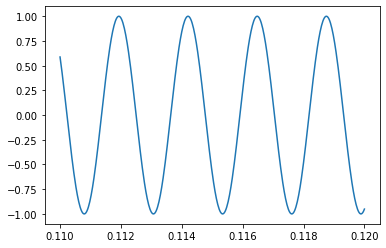

In [6]:
fs = 44000
x = np.linspace(0, 5, 5*fs+1) # 5 seconds of 44000 Hz sampling
y = np.sin(2*np.pi*440*x) # 440 Hz tone

#plt.plot(y)

plot_t(y, 0.11, 0.12, fs, True)

## Problem 2: resampling audio data and writing it to file

The purpose of this problem is to:
- introduce you to [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html), which we will be continuing to use during the course.
- have you figure out how to write data to audio files
- give you experience with figuring out how to use unfamiliar functions own your own
- get you thinking more about the effect of sampling rates on representing signals

*n.b. in my past experience, people have sometimes had problems using `scipy.signal`'s resampling function on their machine. If that ends up being the case for you, you might try instead [`librosa`](https://librosa.github.io/librosa/)'s sampling function.*


1. Resample the bengali audio data using `scipy.signal.resample`, plot the resampled data, and also create a playable Audio object of the resampled data. Do this for two sampling rates: two times the original sampling rate of the file, and half of the original sampling rate of the file. Note: you may need to use `round()` and `int()` to coerce the number of samples to be an integer.
2. Try to explain why the audio sounds the way it does for the upsampled and downsampled audio.
3. Write the re-sampled audio to WAV files in the current directory using `scipy.io.wavfile.write`.
4. Use `scipy.io.wavfile.read` to read in your re-sampled files and check that the sampling rate is what you expect.







In [7]:
#Problem 2
#help(signal.resample)

#1
bengali_2x = signal.resample(bengali, len(bengali)*2)
bengali_halfx = signal.resample(bengali, int(len(bengali)/2))

#help(wavfile.write)

#3
wavfile.write("Fa2x.wav", b_fs*2, bengali_2x)
wavfile.write("Fahalfx.wav", int(b_fs/2), bengali_halfx)

#sanity check on sampling rates (step 4)
print(wavfile.read("Fa2x.wav")[0])
print(wavfile.read("Fahalfx.wav")[0])

#step 2
Audio(data = bengali_2x, rate=b_fs*2)
Audio(data = bengali_halfx, rate = b_fs/2)
Audio(data = bengali, rate = b_fs)

32000
8000


#### Step 2

The upsampled audio sounds clearer, while the downsampled audio sounds more muffled. This is most likely because the upsampled audio has more precision with its data points with respect to time. The opposite is true of the downsampled audio, where the sampling rate will miss the differences in points between samples, causing only lower-frequency audio to pass through.

## Problem 3: Fourier series of a square wave

We will be going over the introductory material you need for this on Tuesday 09/17, so feel free to wait until then to get started on this problem if you like.

### Define a square wave.
1. Define a function for a [square wave](http://mathworld.wolfram.com/SquareWave.html) with a period of 1, with y = 1 from x = 0 to 0.5, and y = 0 from x = 0.5 to 1. You might see if there are any functions in `scipy.signal` that could help.
2. Make a plot of your square wave showing 5 periods.

### Reconstruct the square wave using a Fourier series.
1. Calculate the Fourier coefficients for a square wave.  Note: there are an infinite number of
coefficients, so just calculate the first six. Try to find a
pattern for the coefficient values of the infinite series.
2. Plot the individual Fourier series terms, i.e., make plots of each of the following:
\begin{align}
      a_0\\
      a_1\cos(2\pi nt) + b_1\sin(2\pi nt)\\
      a_2\cos(2\pi nt) + b_2\sin(2\pi nt)\\
      a_3\cos(2\pi nt) + b_3\sin(2\pi nt)\\
      a_4\cos(2\pi nt) + b_4\sin(2\pi nt)\\
      a_5\cos(2\pi nt) + b_5\sin(2\pi nt)
\end{align}

3. Plot the reconstruction of the square wave as you add in successive terms in the Fourier series, i.e., make plots of each of the following (I am subsuming $a_0$ as a term in the sum by having the sum start from $n=0$):

\begin{align}
      \displaystyle\sum\limits_{n=0}^0 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
       \displaystyle\sum\limits_{n=0}^1 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
        \displaystyle\sum\limits_{n=0}^2 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
         \displaystyle\sum\limits_{n=0}^3 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
          \displaystyle\sum\limits_{n=0}^4 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
           \displaystyle\sum\limits_{n=0}^5 \left(a_n\cos(2\pi nt) + b_n\sin(2\pi nt)\right)\\
\end{align}


## Defining a square wave and calculating the coefficients:

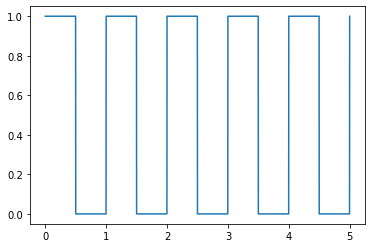

In [89]:
# Defining a square wave.
fs = 500
t = np.linspace(0, 5, 5*fs + 1)
y = 0.5 * signal.square(2 * np.pi * t) + 0.5

plt.plot(t, y)

We don't even need Python to calculate $a_0$ for us; the fact that we're using a square wave mes it easy enough.

\begin{align}
\displaystyle a_0 &= \frac{1}{T}\int_0^Tf(t)dt & \\
&= \frac{1}{1}\int_0^1f(t)dt & \text{$T=1$} \\
&= \int_0^1f(t)dt & \frac{1}{1}=1\\
&= \int_0^1H(t)dt & \text{$f(t) = H(t)$ (the step function)}\\
&= \int_0^{1/2}1dt + \int_{1/2}^10dt & \text{Split D.I. over each part of sq. wv.}\\
&= \int_0^{1/2}1dt & \text{int of 0dt is 0}\\
&= 1/2
\end{align}



This plots as such:

In [12]:
# Determining coefficients
import sympy as sym

\begin{align}
a_n &= \frac{2}{T}\int_0^T f(t)\cos 2\pi ntdt\\ 
&= 2\int_0^1 f(t)\cos 2\pi ntdt\\
&= 2(\int_0^{1/2} 1\cos 2\pi ntdt + \int_{1/2}^1 -1\cos 2\pi ntdt)\\
&= 2\int_0^{1/2}\cos 2\pi ntdt + \int_{1/2}^1 -\cos 2\pi ntdt)\\
\end{align}

Similarly, for $b_n$:
\begin{equation}
\label{eq:bn}
b_n = 2(\int_0^{1/2}\sin 2\pi ntdt + \int_{1/2}^1 -\sin 2\pi ntdt)\\
\end{equation}

In [96]:
x = sym.Symbol('x')
a_coeff = []
b_coeff = []
for n in np.arange(1, 6):
    a_coeff.append(2*(sym.integrate(sym.cos(2*sym.pi*n*x), (x, 0, 1/2))))
    b_coeff.append(2*(sym.integrate(sym.sin(2*sym.pi*n*x), (x, 0, 1/2))))
    
print(a_coeff)
print(b_coeff)

[0, 0, 0, 0, 0]
[2/pi, 0, 2/(3*pi), 0, 2/(5*pi)]


All of the $a$ coefficients are 0, because the cosine doesn't contribute to this fourier series. The sin coefficients, for the odd-numbered harmonics, take a value of $4/n\pi$

### Plotting the component waves

Text(0.5, 1.0, 'a0')

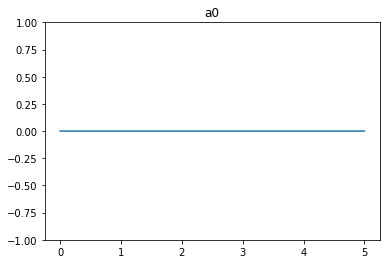

In [93]:
plt.plot(t, [0 for n in t])
plt.ylim(-1,1)
plt.title("a0")

$a_0$ is constant, and 0, so its plot is just the x-axis. Let's plot each of the other component waves:

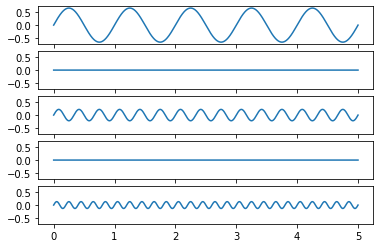

In [104]:
signals = []
for n in np.arange(1, 6):
    signals.append(float(b_coeff[n-1]) * np.sin(2*np.pi*n*t))
    
pltsignals, (p1, p2, p3, p4, p5) = plt.subplots(5, sharex=True, sharey=True)
p1.plot(t, signals[0])
p2.plot(t, signals[1])
p3.plot(t, signals[2])
p4.plot(t, signals[3])
p5.plot(t, signals[4])

Now, let's add 'em all together! (only plotting the odd-numbered harmonics for more clarity)

### Summing it all together

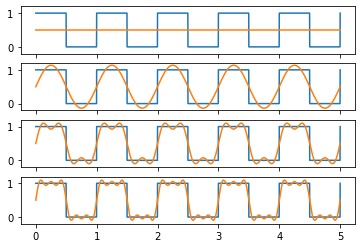

In [107]:
sumplots, (p0, p1, p2, p3) = plt.subplots(4, sharex = True, sharey = True)
a0 = [1/2 for x in t]
p0.plot(t, y)
p0.plot(t, a0)
p1.plot(t, y)
p1.plot(t, a0+signals[0])
p2.plot(t,y)
p2.plot(t, a0+signals[0]+signals[2])
p3.plot(t,y)
p3.plot(t, a0+signals[0]+signals[2]+signals[4])


As we add more and more terms, the fourier series reconstruction looks more and more like the square wave, as expected!